In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
data = pd.read_csv("C:\\Users\\Avani\\Downloads\\Gender_discrimination_base.csv.xls")

In [4]:
data.head()

,Employee,EducLev,JobGrade,Age,Gender,YrsPrior,PCJob,Salary,Yrs Exper,Unnamed: 9
0,1.0,3.0,1.0,26.0,Male,1.0,No,32.0,3.0,NaN
1,2.0,1.0,1.0,38.0,Female,1.0,No,39.1,14.0,NaN
2,3.0,1.0,1.0,35.0,Female,0.0,No,33.2,12.0,NaN
3,4.0,2.0,1.0,40.0,Female,7.0,No,30.6,8.0,NaN
4,5.0,3.0,1.0,28.0,Male,0.0,No,29.0,3.0,NaN


In [5]:
data.columns

Index(['Employee', 'EducLev', 'JobGrade', 'Age', 'Gender', 'YrsPrior', 'PCJob',
       'Salary', 'Yrs Exper', 'Unnamed: 9'],
      dtype='object')

In [6]:
data = data[['Employee', 'EducLev', 'JobGrade', 'Age', 'Gender', 'YrsPrior', 'PCJob',
       'Salary', 'Yrs Exper']]

In [6]:
data.head()

,Employee,EducLev,JobGrade,Age,Gender,YrsPrior,PCJob,Salary,Yrs Exper
0,1.0,3.0,1.0,26.0,Male,1.0,No,32.0,3.0
1,2.0,1.0,1.0,38.0,Female,1.0,No,39.1,14.0
2,3.0,1.0,1.0,35.0,Female,0.0,No,33.2,12.0
3,4.0,2.0,1.0,40.0,Female,7.0,No,30.6,8.0
4,5.0,3.0,1.0,28.0,Male,0.0,No,29.0,3.0


In [7]:
data.dtypes

Employee     float64
EducLev      float64
JobGrade     float64
Age          float64
Gender        object
YrsPrior     float64
PCJob         object
Salary       float64
Yrs Exper    float64
dtype: object

In [8]:
data['Employee'] = data['Employee'].astype(str)

In [9]:
data.dtypes

Employee      object
EducLev      float64
JobGrade     float64
Age          float64
Gender        object
YrsPrior     float64
PCJob         object
Salary       float64
Yrs Exper    float64
dtype: object

In [10]:
data.isnull().sum()/data.shape[0]

Employee     0.000000
EducLev      0.004785
JobGrade     0.004785
Age          0.004785
Gender       0.004785
YrsPrior     0.004785
PCJob        0.004785
Salary       0.004785
Yrs Exper    0.004785
dtype: float64

In [11]:
temp = data.copy()

In [12]:
temp.isnull().sum()/temp.shape[0]

Employee     0.000000
EducLev      0.004785
JobGrade     0.004785
Age          0.004785
Gender       0.004785
YrsPrior     0.004785
PCJob        0.004785
Salary       0.004785
Yrs Exper    0.004785
dtype: float64

In [13]:
temp = temp.dropna()

In [14]:
data.dropna(inplace = True)

In [15]:
temp.isnull().sum()/temp.shape[0]

Employee     0.0
EducLev      0.0
JobGrade     0.0
Age          0.0
Gender       0.0
YrsPrior     0.0
PCJob        0.0
Salary       0.0
Yrs Exper    0.0
dtype: float64

In [16]:
data.isnull().sum()/data.shape[0]

Employee     0.0
EducLev      0.0
JobGrade     0.0
Age          0.0
Gender       0.0
YrsPrior     0.0
PCJob        0.0
Salary       0.0
Yrs Exper    0.0
dtype: float64

### EDA

In [17]:
data.head()

,Employee,EducLev,JobGrade,Age,Gender,YrsPrior,PCJob,Salary,Yrs Exper
0,1.0,3.0,1.0,26.0,Male,1.0,No,32.0,3.0
1,2.0,1.0,1.0,38.0,Female,1.0,No,39.1,14.0
2,3.0,1.0,1.0,35.0,Female,0.0,No,33.2,12.0
3,4.0,2.0,1.0,40.0,Female,7.0,No,30.6,8.0
4,5.0,3.0,1.0,28.0,Male,0.0,No,29.0,3.0


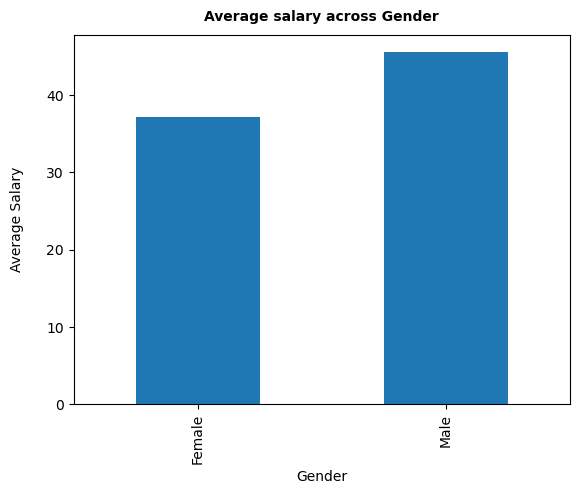

In [21]:
plt.title('Average salary across Gender', fontsize=10, y=1.015,fontweight='semibold')
plt.ylabel('Average Salary', labelpad=16)
data.groupby('Gender')['Salary'].mean().plot(kind = 'bar');

In [19]:
data.groupby('Gender')['Salary'].mean()

Gender
Female    37.209929
Male      45.505441
Name: Salary, dtype: float64

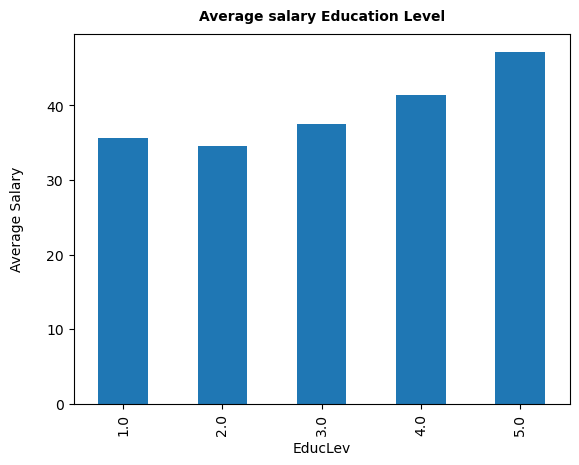

In [20]:
plt.title('Average salary Education Level', fontsize=10, y=1.015,fontweight='semibold')
plt.ylabel('Average Salary', labelpad=16)
data.groupby('EducLev')['Salary'].mean().plot(kind = 'bar');

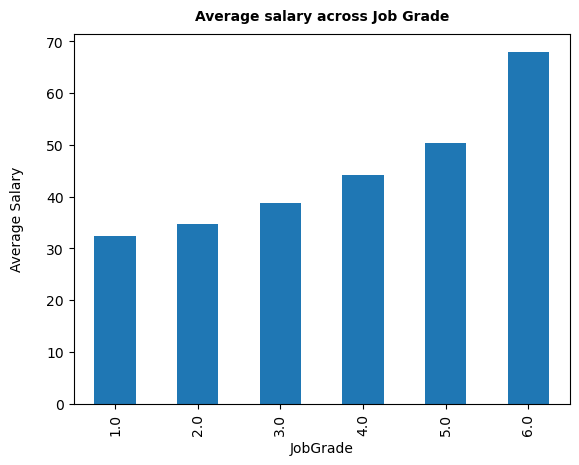

In [22]:
plt.title('Average salary across Job Grade', fontsize=10, y=1.015,fontweight='semibold')
plt.ylabel('Average Salary', labelpad=16)
data.groupby('JobGrade')['Salary'].mean().plot(kind = 'bar');

Text(0.5, 1.015, 'Salary v/s YrsPriro')

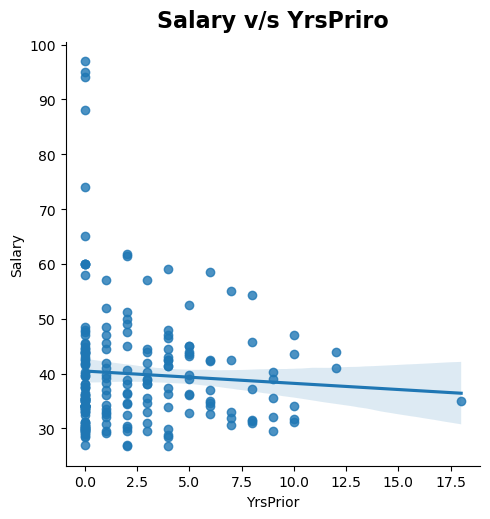

In [23]:
#Trying to find the relationship between Salary and Yrs Prior
sns.lmplot(data = data , x = 'YrsPrior',y = 'Salary');
ax = plt.gca()
ax.set_title("Salary v/s YrsPriro", fontsize=16, y=1.015,fontweight='semibold')

Text(0.5, 1.015, 'Salary v/s Yrs Exper')

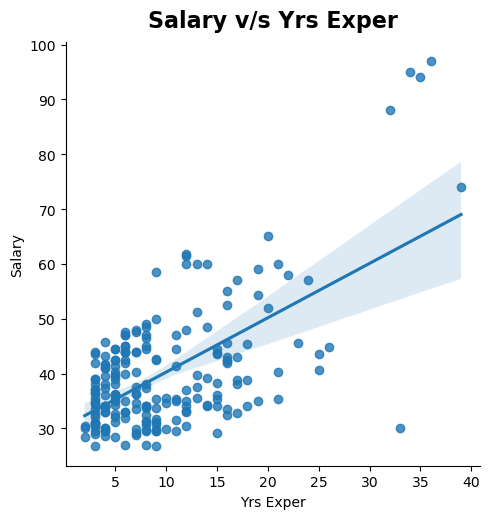

In [24]:
#Trying to find the relationship between Salary and Yrs Exper
sns.lmplot(data = data , x = 'Yrs Exper',y = 'Salary');
ax = plt.gca()
ax.set_title("Salary v/s Yrs Exper", fontsize=16, y=1.015,fontweight='semibold')

##### Creating Dummy Variables

In [25]:
data = pd.get_dummies(data, columns = ['Gender','PCJob','JobGrade',"EducLev"],drop_first = True)

In [26]:
data.head()

,Employee,Age,YrsPrior,Salary,Yrs Exper,Gender_Male,PCJob_Yes,JobGrade_2.0,JobGrade_3.0,JobGrade_4.0,JobGrade_5.0,JobGrade_6.0,EducLev_2.0,EducLev_3.0,EducLev_4.0,EducLev_5.0
0,1.0,26.0,1.0,32.0,3.0,1,0,0,0,0,0,0,0,1,0,0
1,2.0,38.0,1.0,39.1,14.0,0,0,0,0,0,0,0,0,0,0,0
2,3.0,35.0,0.0,33.2,12.0,0,0,0,0,0,0,0,0,0,0,0
3,4.0,40.0,7.0,30.6,8.0,0,0,0,0,0,0,0,1,0,0,0
4,5.0,28.0,0.0,29.0,3.0,1,0,0,0,0,0,0,0,1,0,0


In [27]:
data.columns

Index(['Employee', 'Age', 'YrsPrior', 'Salary', 'Yrs Exper', 'Gender_Male',
       'PCJob_Yes', 'JobGrade_2.0', 'JobGrade_3.0', 'JobGrade_4.0',
       'JobGrade_5.0', 'JobGrade_6.0', 'EducLev_2.0', 'EducLev_3.0',
       'EducLev_4.0', 'EducLev_5.0'],
      dtype='object')

In [28]:
x = data[['Age', 'YrsPrior', 'Yrs Exper', 'Gender_Male',
       'PCJob_Yes', 'JobGrade_2.0', 'JobGrade_3.0', 'JobGrade_4.0',
       'JobGrade_5.0', 'JobGrade_6.0', 'EducLev_2.0', 'EducLev_3.0',
       'EducLev_4.0', 'EducLev_5.0']]

In [29]:
x['Femal_Exp'] = np.where(x['Gender_Male']==1,0,x['Yrs Exper'])

C:\Users\Avani\AppData\Local\Temp\ipykernel_29160\1651595340.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Femal_Exp'] = np.where(x['Gender_Male']==1,0,x['Yrs Exper'])


In [30]:
y = data[['Salary']]

In [31]:
x.head()

,Age,YrsPrior,Yrs Exper,Gender_Male,PCJob_Yes,JobGrade_2.0,JobGrade_3.0,JobGrade_4.0,JobGrade_5.0,JobGrade_6.0,EducLev_2.0,EducLev_3.0,EducLev_4.0,EducLev_5.0,Femal_Exp
0,26.0,1.0,3.0,1,0,0,0,0,0,0,0,1,0,0,0.0
1,38.0,1.0,14.0,0,0,0,0,0,0,0,0,0,0,0,14.0
2,35.0,0.0,12.0,0,0,0,0,0,0,0,0,0,0,0,12.0
3,40.0,7.0,8.0,0,0,0,0,0,0,0,1,0,0,0,8.0
4,28.0,0.0,3.0,1,0,0,0,0,0,0,0,1,0,0,0.0


In [32]:
y.head()

,Salary
0,32.0
1,39.1
2,33.2
3,30.6
4,29.0


In [33]:
x.columns

Index(['Age', 'YrsPrior', 'Yrs Exper', 'Gender_Male', 'PCJob_Yes',
       'JobGrade_2.0', 'JobGrade_3.0', 'JobGrade_4.0', 'JobGrade_5.0',
       'JobGrade_6.0', 'EducLev_2.0', 'EducLev_3.0', 'EducLev_4.0',
       'EducLev_5.0', 'Femal_Exp'],
      dtype='object')

#### Variance Inflation Factor

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [35]:
def get_vif_factors(X):
    X_matrix = X.values
    vif = [variance_inflation_factor(X_matrix,i) for i in range(X_matrix.shape[1])]
    vif_factors = pd.DataFrame()
    vif_factors['column'] = X.columns
    vif_factors['VIF'] = vif
    
    return vif_factors

In [36]:
get_vif_factors(x)

,column,VIF
0,Age,14.456783
1,YrsPrior,1.982381
2,Yrs Exper,15.059376
3,Gender_Male,4.312599
4,PCJob_Yes,1.301893
5,JobGrade_2.0,1.809715
6,JobGrade_3.0,2.148266
7,JobGrade_4.0,1.971550
8,JobGrade_5.0,2.294130
9,JobGrade_6.0,3.973471


In [37]:
X_matrix = x.values
print(X_matrix)

[[26.  1.  3. ...  0.  0.  0.]
 [38.  1. 14. ...  0.  0. 14.]
 [35.  0. 12. ...  0.  0. 12.]
 ...
 [62.  0. 32. ...  0.  1.  0.]
 [59.  0. 35. ...  0.  1.  0.]
 [62.  0. 33. ...  0.  1. 33.]]


In [38]:
variance_inflation_factor(X_matrix,1)

1.9823810620384086

In [39]:
x = x[['YrsPrior', 'Yrs Exper', 'Gender_Male', 'PCJob_Yes',
       'JobGrade_2.0', 'JobGrade_3.0', 'JobGrade_4.0', 'JobGrade_5.0',
       'JobGrade_6.0', 'EducLev_2.0', 'EducLev_3.0', 'EducLev_4.0',
       'EducLev_5.0','Femal_Exp']]

In [40]:
get_vif_factors(x)

,column,VIF
0,YrsPrior,1.777583
1,Yrs Exper,12.757366
2,Gender_Male,3.936027
3,PCJob_Yes,1.281534
4,JobGrade_2.0,1.768602
5,JobGrade_3.0,2.139425
6,JobGrade_4.0,1.966822
7,JobGrade_5.0,2.277461
8,JobGrade_6.0,3.946979
9,EducLev_2.0,1.709190


#### Building Regression Model

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
data.columns

Index(['Employee', 'Age', 'YrsPrior', 'Salary', 'Yrs Exper', 'Gender_Male',
       'PCJob_Yes', 'JobGrade_2.0', 'JobGrade_3.0', 'JobGrade_4.0',
       'JobGrade_5.0', 'JobGrade_6.0', 'EducLev_2.0', 'EducLev_3.0',
       'EducLev_4.0', 'EducLev_5.0'],
      dtype='object')

In [43]:
# using the train test split function
X_train, X_test,y_train, y_test = train_test_split(x,y ,random_state=104, test_size=0.25, shuffle=True)

In [44]:
X_train.columns

Index(['YrsPrior', 'Yrs Exper', 'Gender_Male', 'PCJob_Yes', 'JobGrade_2.0',
       'JobGrade_3.0', 'JobGrade_4.0', 'JobGrade_5.0', 'JobGrade_6.0',
       'EducLev_2.0', 'EducLev_3.0', 'EducLev_4.0', 'EducLev_5.0',
       'Femal_Exp'],
      dtype='object')

In [45]:
y_train.columns

Index(['Salary'], dtype='object')

In [46]:
208*0.25

52.0

In [47]:
x.shape

(208, 14)

In [48]:
X_train.shape

(156, 14)

In [49]:
X_test.shape

(52, 14)

### Model 1

<h6> Features : Gender </h6>

In [50]:
import statsmodels.api as sm
regression_model = sm.OLS(y_train['Salary'], sm.add_constant(X_train['Gender_Male'])).fit()
regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     19.64
Date:                Tue, 07 Feb 2023   Prob (F-statistic):           1.77e-05
Time:                        23:32:20   Log-Likelihood:                -591.21
No. Observations:                 156   AIC:                             1186.
Df Residuals:                     154   BIC:                             1193.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          37.4858      1.078     34.786      0.000      35.357      39.615
Gender_Male     7.9708      1.799      4.432      0.000       4.418      11.524
==============================================================================
Omnibus:                       76.346   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              326.107
Skew:                           1.824   Prob(JB):                     1.54e-71
Kurtosis:                       9.071   Cond. No.                         2.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# Residual Analysis
def draw_pp_plot( model, title ):
    probplot = sm.ProbPlot( model.resid );
    plt.figure( figsize = (8, 6) )
    probplot.ppplot( line='45' );
    plt.title( title );
    plt.show();

<Figure size 800x600 with 0 Axes>

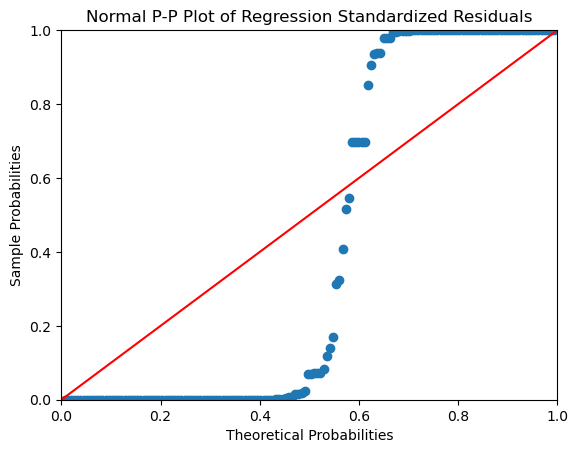

In [53]:
draw_pp_plot(regression_model,"Normal P-P Plot of Regression Standardized Residuals");

In [54]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

In [56]:
def plot_resid_fitted(fitted, resid, title):
    plt.scatter(get_standardized_values( fitted ),get_standardized_values( resid ) )
    plt.title(title)
    plt.xlabel("Standardized predicted values")
    plt.ylabel("Standardized residual values")
    plt.show()

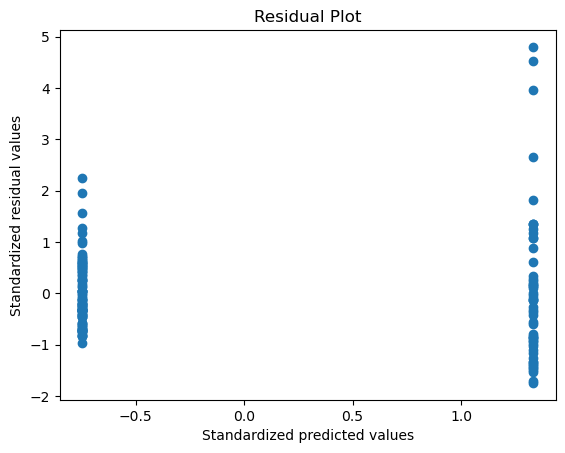

In [57]:
plot_resid_fitted(regression_model.fittedvalues,regression_model.resid,"Residual Plot")

### Model 2
<h6>Features : Gender and Yrs_Exp</h6>

In [58]:
regression_model_2 = sm.OLS(y_train['Salary'], sm.add_constant(X_train[['Gender_Male','Yrs Exper']])).fit()
regression_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     72.13
Date:                Tue, 07 Feb 2023   Prob (F-statistic):           8.59e-23
Time:                        23:33:53   Log-Likelihood:                -548.77
No. Observations:                 156   AIC:                             1104.
Df Residuals:                     153   BIC:                             1113.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          28.3792      1.195     23.749      0.000      26.018      30.740
Gender_Male     7.7074      1.375      5.606      0.000       4.991      10.424
Yrs Exper       0.9506      0.090     10.518      0.000       0.772       1.129
==============================================================================
Omnibus:                       10.242   Durbin-Watson:                   2.199
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               15.334
Skew:                           0.351   Prob(JB):                     0.000468
Kurtosis:                       4.366   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Figure size 800x600 with 0 Axes>

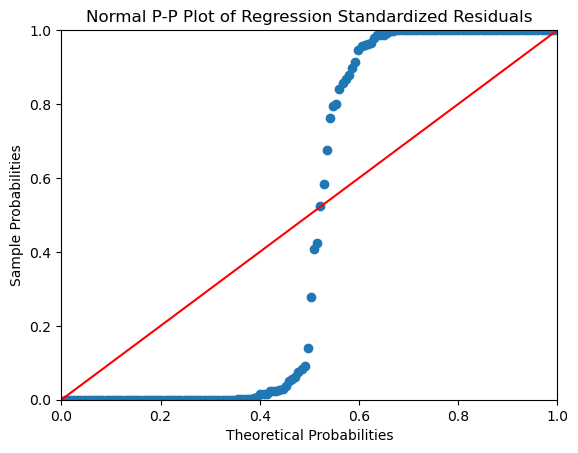

In [59]:
draw_pp_plot(regression_model_2,"Normal P-P Plot of Regression Standardized Residuals");

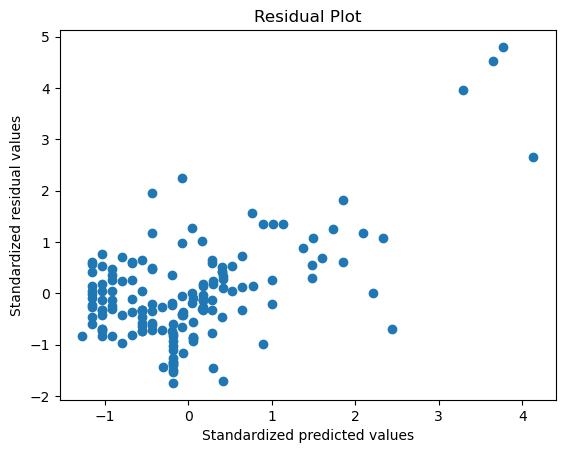

In [60]:
plot_resid_fitted(regression_model_2.fittedvalues,regression_model.resid,"Residual Plot")

#### Model 3

<h6> Features : Gender,Yrs_Exp and Yrs_Exp Female </h6>

In [61]:
regression_model_3 = sm.OLS(y_train['Salary'], sm.add_constant(X_train[['Gender_Male','Yrs Exper','Femal_Exp']])).fit()
regression_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     94.03
Date:                Tue, 07 Feb 2023   Prob (F-statistic):           1.85e-34
Time:                        23:34:34   Log-Likelihood:                -518.72
No. Observations:                 156   AIC:                             1045.
Df Residuals:                     152   BIC:                             1058.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          35.3145      1.285     27.482      0.000      32.776      37.853
Gender_Male    -4.6674      1.854     -2.517      0.013      -8.331      -1.004
Yrs Exper       1.5024      0.099     15.133      0.000       1.306       1.699
Femal_Exp      -1.2758      0.151     -8.451      0.000      -1.574      -0.978
==============================================================================
Omnibus:                        5.291   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.071   Jarque-Bera (JB):                5.560
Skew:                           0.275   Prob(JB):                       0.0620
Kurtosis:                       3.744   Cond. No.                         55.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Figure size 800x600 with 0 Axes>

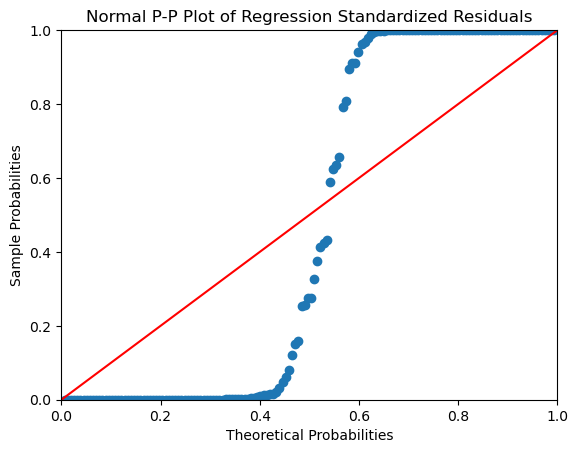

In [62]:
draw_pp_plot(regression_model_3,"Normal P-P Plot of Regression Standardized Residuals");

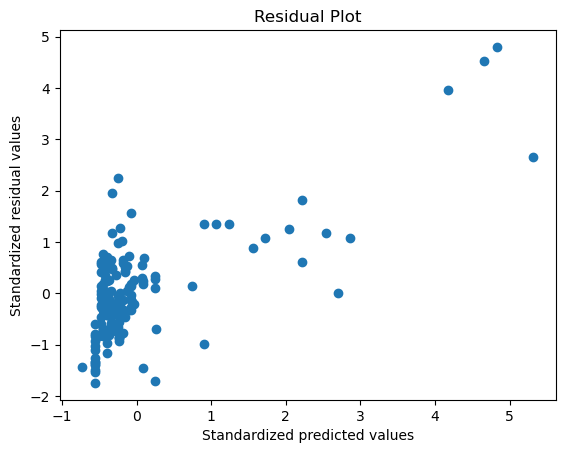

In [63]:
plot_resid_fitted(regression_model_3.fittedvalues,regression_model.resid,"Residual Plot")

#### Model 4

<h6> Gender, Yrs_Exp, Yrs_Exp_Female and Job Grade </h6>

In [64]:
regression_model_4 = sm.OLS(y_train['Salary'], sm.add_constant(X_train[['Gender_Male','Yrs Exper','Femal_Exp','JobGrade_2.0',
       'JobGrade_3.0', 'JobGrade_4.0', 'JobGrade_5.0', 'JobGrade_6.0']])).fit()
regression_model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     75.25
Date:                Tue, 07 Feb 2023   Prob (F-statistic):           3.97e-48
Time:                        23:35:19   Log-Likelihood:                -473.56
No. Observations:                 156   AIC:                             965.1
Df Residuals:                     147   BIC:                             992.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           32.7968      1.173     27.958      0.000      30.479      35.115
Gender_Male     -6.2637      1.442     -4.344      0.000      -9.113      -3.414
Yrs Exper        1.0277      0.114      9.029      0.000       0.803       1.253
Femal_Exp       -1.0448      0.132     -7.888      0.000      -1.307      -0.783
JobGrade_2.0     2.8726      1.256      2.287      0.024       0.391       5.354
JobGrade_3.0     6.3740      1.202      5.303      0.000       3.999       8.749
JobGrade_4.0    10.8402      1.396      7.767      0.000       8.082      13.599
JobGrade_5.0    14.2292      1.602      8.881      0.000      11.063      17.396
JobGrade_6.0    16.9700      2.675      6.344      0.000      11.684      22.256
==============================================================================
Omnibus:                       12.950   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               34.990
Skew:                           0.141   Prob(JB):                     2.52e-08
Kurtosis:                       5.303   Cond. No.                         99.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Figure size 800x600 with 0 Axes>

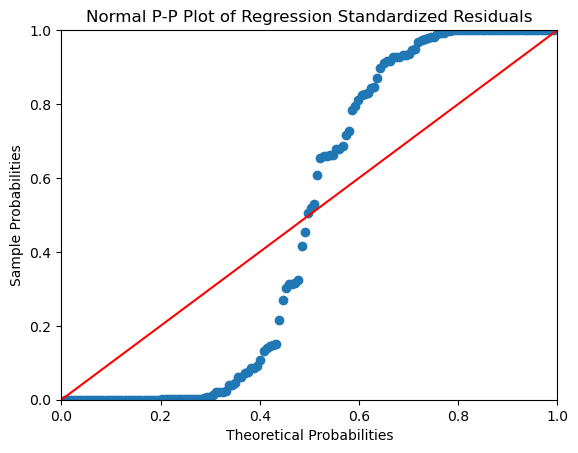

In [65]:
draw_pp_plot(regression_model_4,"Normal P-P Plot of Regression Standardized Residuals");

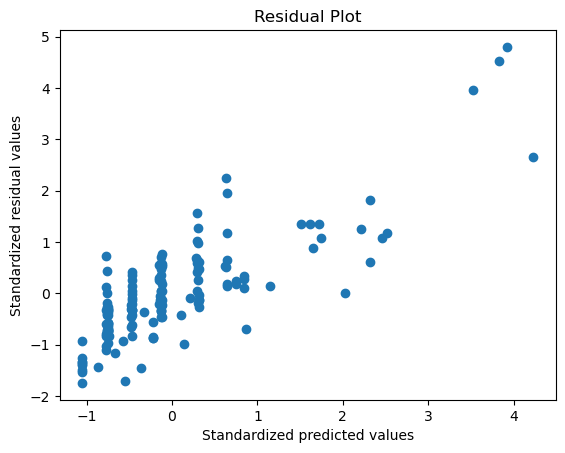

In [66]:
plot_resid_fitted(regression_model_4.fittedvalues,regression_model.resid,"Residual Plot")

In [67]:
y_pred_stat = regression_model_4.predict(sm.add_constant(X_test[['Gender_Male','Yrs Exper','Femal_Exp','JobGrade_2.0',
       'JobGrade_3.0', 'JobGrade_4.0', 'JobGrade_5.0', 'JobGrade_6.0']]))

In [86]:
y_pred_stat

34     32.557856
49     32.762634
47     31.671671
95     35.532864
51     32.728505
35     32.472532
5      32.745569
91     35.413410
18     32.711440
140    38.948922
45     44.004310
28     32.591986
90     35.413410
64     35.601123
117    39.068375
133    38.897727
180    46.889438
201    65.085187
160    42.511858
56     32.523727
73     33.516570
145    42.511858
58     32.643180
52     32.677310
70     35.584058
88     33.516570
171    43.449237
75     35.515799
68     35.379280
78     35.532864
86     35.566993
203    78.445546
170    43.363913
106    39.051311
181    46.752920
66     35.481669
41     32.540792
158    41.484138
1      32.557856
164    43.539578
110    39.085440
108    39.102505
61     35.572010
9      32.643180
104    39.051311
187    46.821179
10     32.643180
144    39.085440
109    39.000116
20     32.728505
175    48.984024
107    39.051311
dtype: float64

### Model Evaluation

In [68]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
  
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred_stat)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred_stat) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred_stat)
rmse = np.sqrt(rmse)
  
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 3.174782324393683
MSE: 20.356210385371305
RMSE: 4.511785720241078


#### Using SkLearn

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
regr = LinearRegression()

In [71]:
regr.fit(X_train[['Gender_Male','Yrs Exper','Femal_Exp','JobGrade_2.0',
       'JobGrade_3.0', 'JobGrade_4.0', 'JobGrade_5.0', 'JobGrade_6.0']], y_train)

LinearRegression()

In [72]:
regr.score(X_test[['Gender_Male','Yrs Exper','Femal_Exp','JobGrade_2.0',
       'JobGrade_3.0', 'JobGrade_4.0', 'JobGrade_5.0', 'JobGrade_6.0']],y_test)

0.8221157241766462

In [73]:
y_pred_sk = regr.predict(X_test[['Gender_Male','Yrs Exper','Femal_Exp','JobGrade_2.0',
       'JobGrade_3.0', 'JobGrade_4.0', 'JobGrade_5.0', 'JobGrade_6.0']])

In [74]:
y_pred_sk.shape

(52, 1)

In [75]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
  
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred_sk)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred_sk) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred_sk)
rmse = np.sqrt(rmse)
  
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 3.174782324393679
MSE: 20.356210385371085
RMSE: 4.511785720241054


In [76]:
np.sqrt(20.35)

4.511097427455985